# Imports

In [9]:
import json
import os
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

# 📂 Paramètres

In [20]:
GRAPH_PATH = "./../data/graphs/1/13.json" 

# 📥 Chargement du graphe

In [21]:
with open(GRAPH_PATH, "r", encoding="utf-8") as f:
    graph_data = json.load(f)

nodes = graph_data["nodes"]
edges = graph_data["edges"]

# 🔧 Construction du graphe networkx

In [22]:
G = nx.DiGraph()
for node in nodes:
    label = f"{node['type']}\n{node['name']}".strip()
    G.add_node(node["id"], label=label)

for src, dst in edges:
    G.add_edge(src, dst)

# 🎨 Visualisation

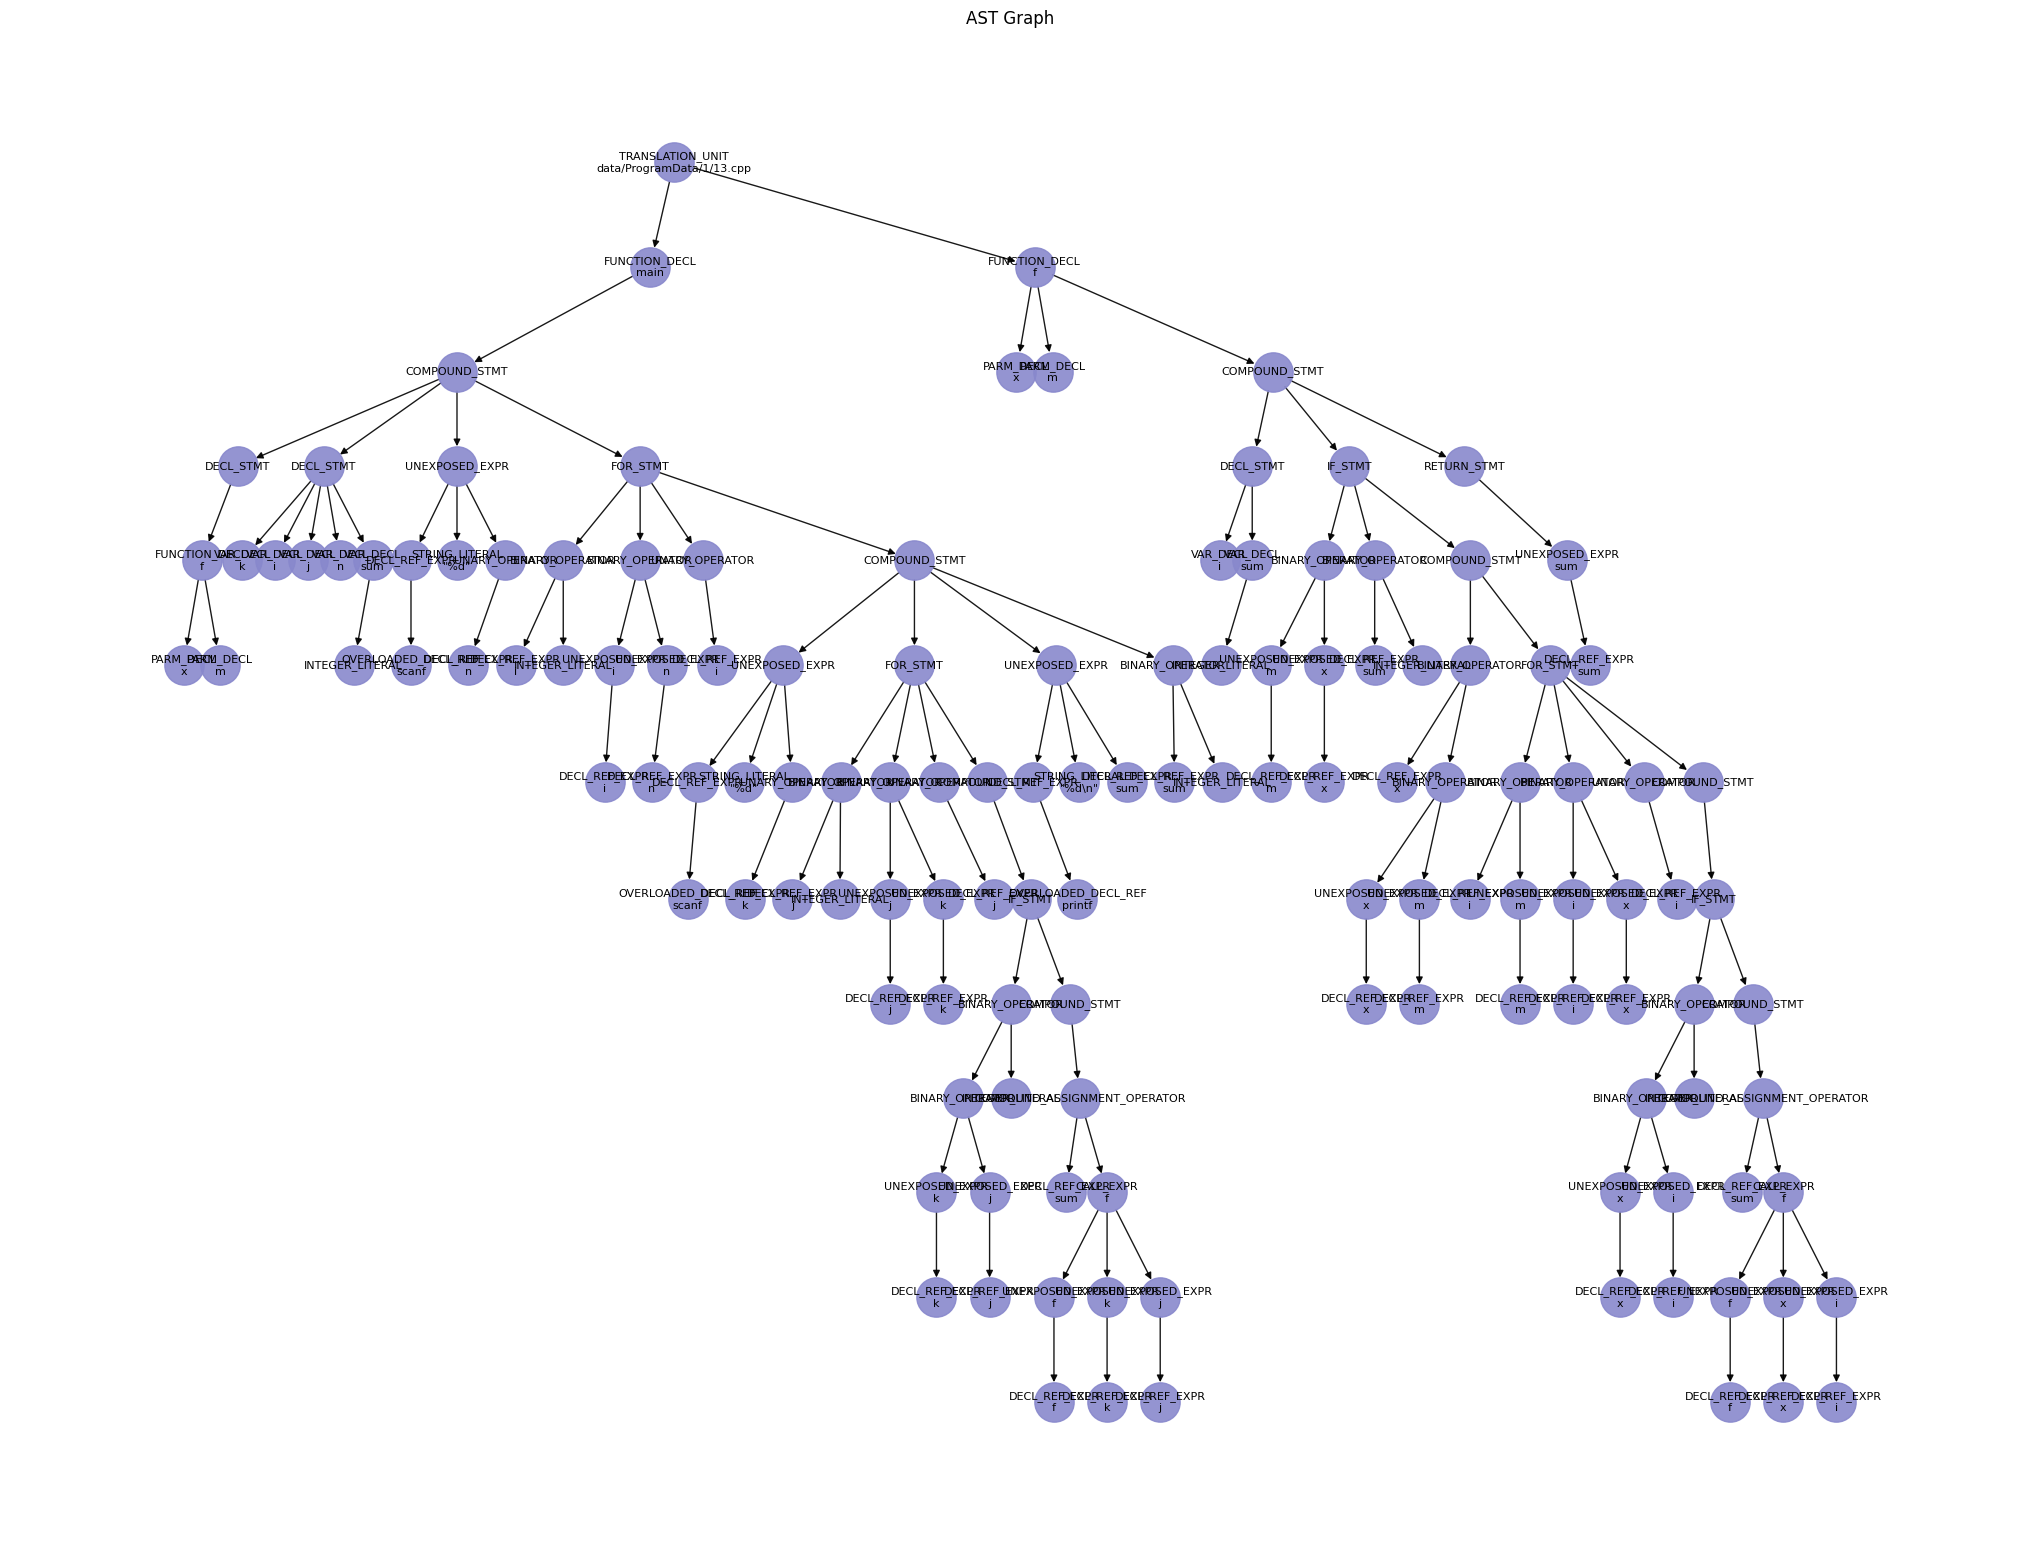

In [23]:
plt.figure(figsize=(20, 15))
pos = graphviz_layout(G, prog="dot")

nx.draw(G, pos, with_labels=False, arrows=True, node_size=800, node_color="#88c", alpha=0.9)
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title("AST Graph")
plt.axis("off")
plt.show()